In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
import random
%matplotlib inline

In [2]:
file_path = 'data/gapminder_under5mortality.csv'
child_mortality_df = pd.read_csv(file_path, index_col = 0)
child_mortality_df.index.names = ['country']

child_mortality_df.shape

(440, 216)

In [3]:
child_mortality_df.head()



,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0


Clean data, remove countiry with missing or no information.

In [4]:
child_mortality_clean = child_mortality_df.dropna()
#child_mortality_clean = child_mortality_clean.drop(child_mortality_clean.columns[[i for i in range(0,100)]], axis=1)  # df.columns is zero-based pd.Index 


In [5]:
child_mortality_clean.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,200.5,196.4,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9
Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,440.23,...,11.8,11.3,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

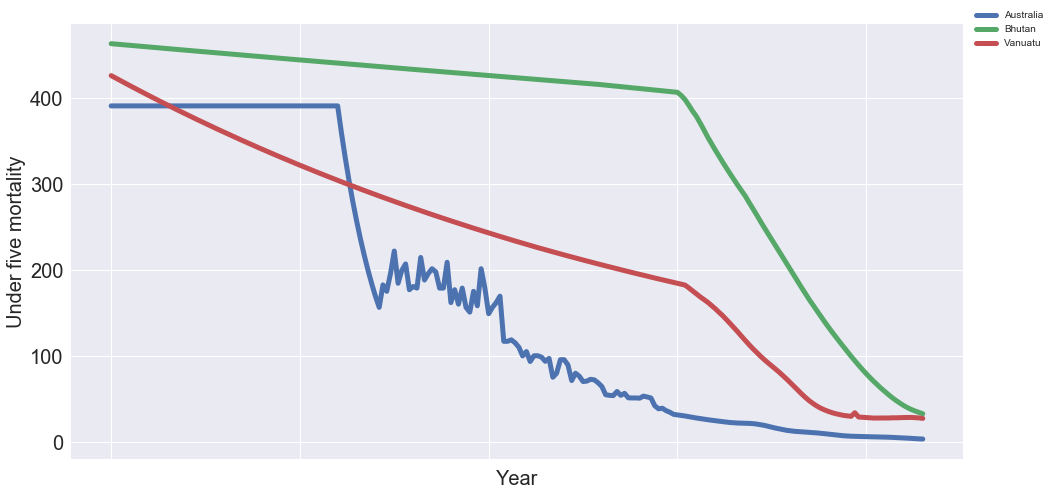

In [7]:
labels = []


fig = plt.figure()
ax = plt.subplot(111)
for i in range(child_mortality_clean.shape[0]):
    plot = random.randint(0, 100)
    if plot<3:
        child_mortality_clean.iloc[i].plot(x=child_mortality_clean.axes[1],figsize=(16,8), linewidth=5, fontsize=20)
        labels.append(child_mortality_clean.index[i])
    plt.legend(labels);
plt.xlabel('Year', fontsize=20);
plt.ylabel('Under five mortality', fontsize=20);

ax.legend(bbox_to_anchor=(1.1, 1.05))


Implementing PCA

In [8]:
from  sklearn.decomposition  import PCA

pca = PCA(n_components=4)
pca.fit(child_mortality_clean)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
child_mortality_4D = pca.transform(child_mortality_clean)
print(pca.explained_variance_ratio_)

[0.76831065 0.12479226 0.03627298 0.02262252]


In [10]:
child_mortality_PC_df = pd.DataFrame(child_mortality_4D)
child_mortality_PC_df.index = child_mortality_clean.index
child_mortality_PC_df.columns = ['PC1','PC2','PC3','PC4']
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,-1640.962019,-433.084866,113.775000,46.322522
Albania,275.775641,80.866800,-277.642172,-160.617319
Algeria,-914.671217,132.754213,-51.810449,131.642385
Angola,-1658.840597,-405.102842,293.550760,-56.821857
Antigua and Barbuda,1481.556193,-354.894205,69.464114,340.838996


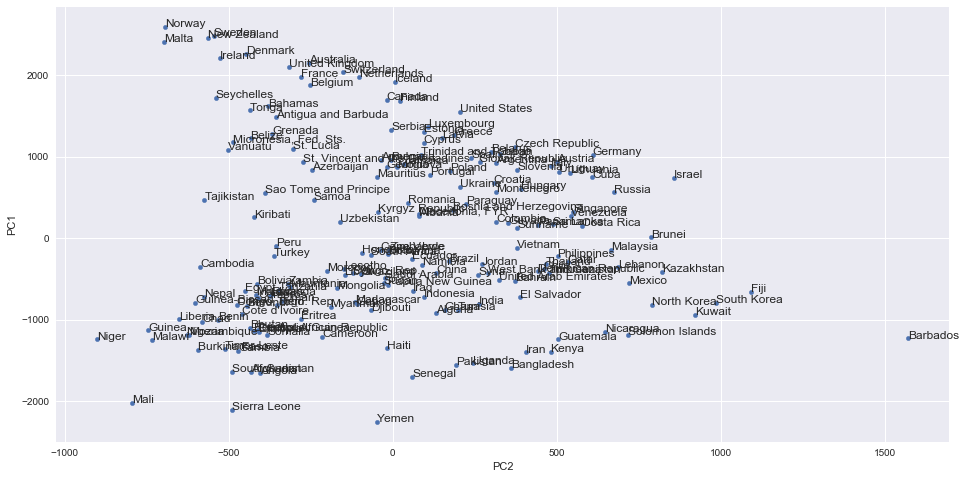

In [11]:
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(child_mortality_PC_df.index):
    ax.annotate(country, (child_mortality_PC_df.iloc[i].PC2, child_mortality_PC_df.iloc[i].PC1))

In [12]:
from sklearn.preprocessing import normalize

child_mortality_PC_df['country_mean'] = pd.Series(child_mortality_clean.mean(axis=1), index=child_mortality_clean.index)
country_mean_max = child_mortality_PC_df['country_mean'].max()
country_mean_min = child_mortality_PC_df['country_mean'].min()
country_mean_scaled = (child_mortality_PC_df.country_mean-country_mean_min) / country_mean_max
child_mortality_PC_df['country_mean_scaled'] = pd.Series(country_mean_scaled, index=child_mortality_clean.index)
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4,country_mean,country_mean_scaled
country,,,,,,
Afghanistan,-1640.962019,-433.084866,113.775000,46.322522,400.369907,0.622810
Albania,275.775641,80.866800,-277.642172,-160.617319,270.369120,0.327422
Algeria,-914.671217,132.754213,-51.810449,131.642385,350.462222,0.509410
Angola,-1658.840597,-405.102842,293.550760,-56.821857,408.963935,0.642338
Antigua and Barbuda,1481.556193,-354.894205,69.464114,340.838996,204.621065,0.178029


In [13]:
child_mortality_PC_df['country_change'] = pd.Series(child_mortality_clean['1900']-child_mortality_clean['2015'], index=child_mortality_clean.index)
country_change_max = child_mortality_PC_df['country_change'].max()
country_change_min = child_mortality_PC_df['country_change'].min()
country_change_scaled = (child_mortality_PC_df.country_change - country_change_min) / country_change_max
child_mortality_PC_df['country_change_scaled'] = pd.Series(country_change_scaled, index=child_mortality_PC_df.index)
child_mortality_PC_df[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,390.67,0.444650
Albania,360.39,0.398409
Algeria,435.21,0.512667
Angola,327.73,0.348533
Antigua and Barbuda,202.18,0.156804


In [14]:
child_mortality_PC_df['country_change_recent'] = pd.Series(child_mortality_clean['1900']-child_mortality_clean['2015'], index=child_mortality_clean.index)
country_change_max = child_mortality_PC_df['country_change_recent'].max()
country_change_min = child_mortality_PC_df['country_change_recent'].min()
country_change_scaled = (child_mortality_PC_df.country_change - country_change_min) / country_change_max
child_mortality_PC_df['country_change_recent_scaled'] = pd.Series(country_change_scaled, index=child_mortality_PC_df.index)
child_mortality_PC_df[['country_change_recent','country_change_recent_scaled']].head()

,country_change_recent,country_change_recent_scaled
country,,
Afghanistan,390.67,0.444650
Albania,360.39,0.398409
Algeria,435.21,0.512667
Angola,327.73,0.348533
Antigua and Barbuda,202.18,0.156804


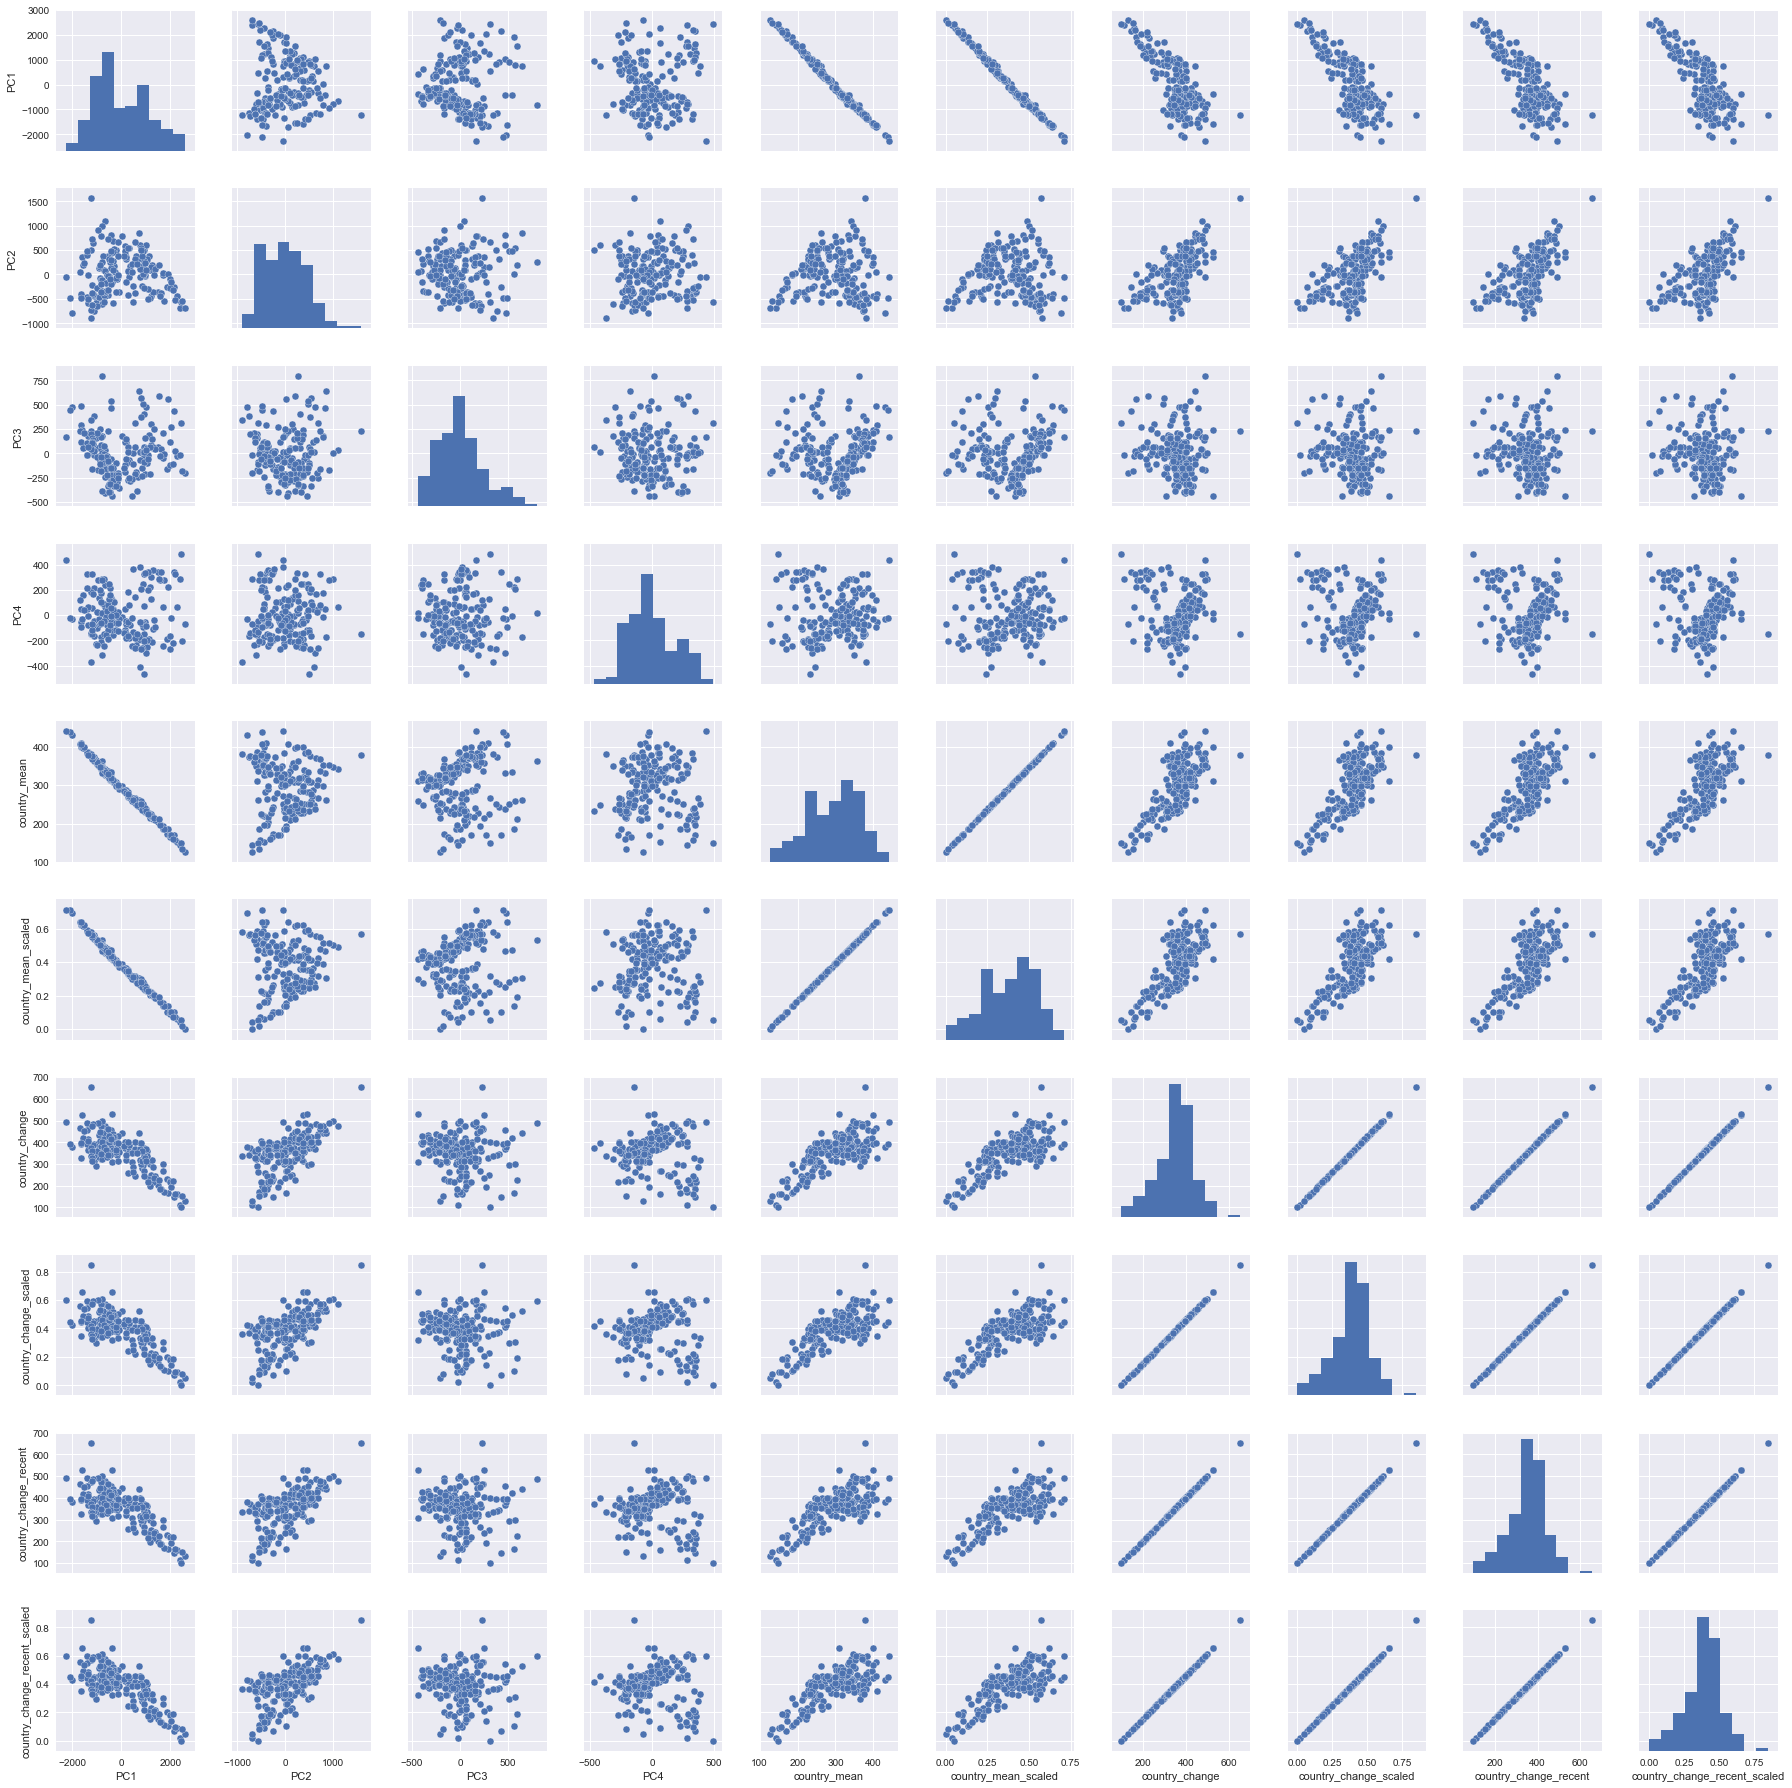

In [15]:
seaborn.pairplot(child_mortality_PC_df)

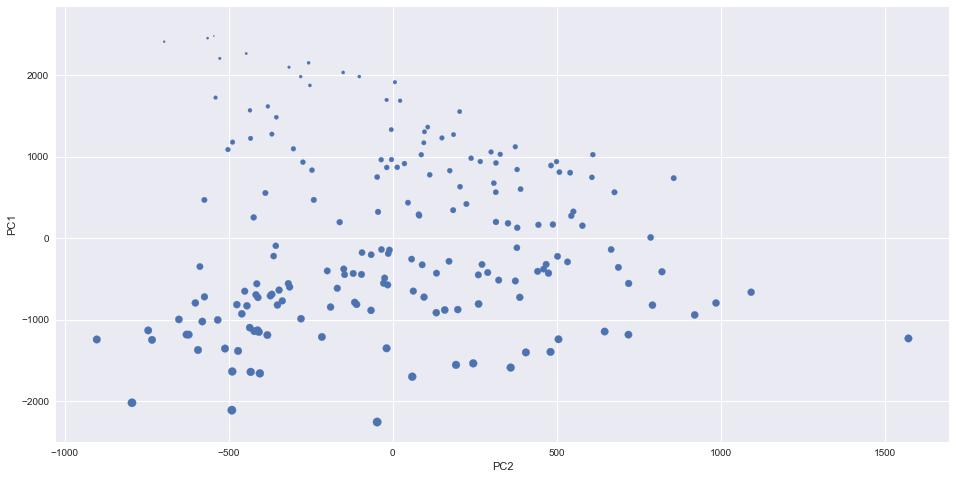

In [16]:
child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', s=child_mortality_PC_df['country_mean_scaled']*100, figsize=(16,8))

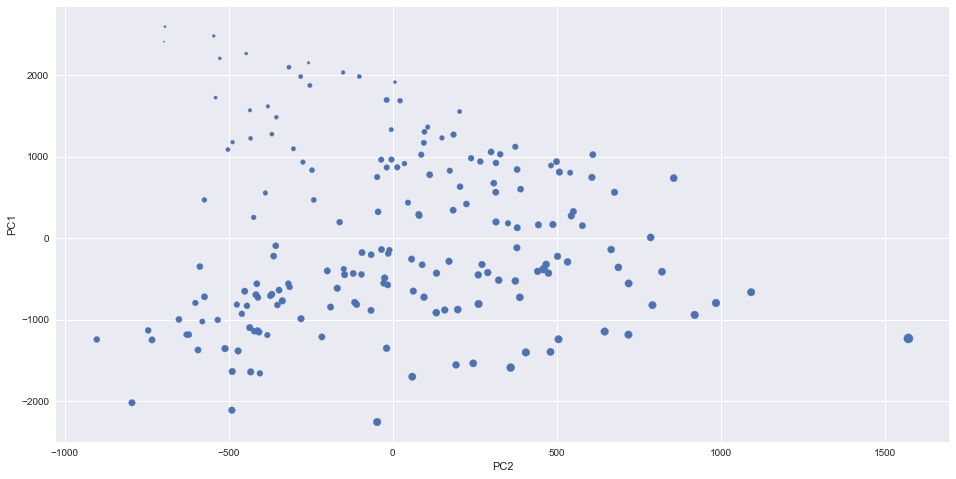

In [17]:
child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', s=child_mortality_PC_df['country_change_scaled']*100, figsize=(16,8))

In [18]:
from  sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

clusters = kmeans.fit(child_mortality_PC_df[['PC1','PC2','PC3','PC4']])

In [19]:
child_mortality_PC_df['cluster'] = pd.Series(clusters.labels_, index=child_mortality_PC_df.index)
child_mortality_clean['cluster'] = pd.Series(clusters.labels_, index=child_mortality_clean.index)

child_mortality_clean.head()

/Users/camilarangelsmith/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,cluster
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1,1
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0,0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0,3
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,196.4,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9,1
Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,440.23,...,11.3,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1,2


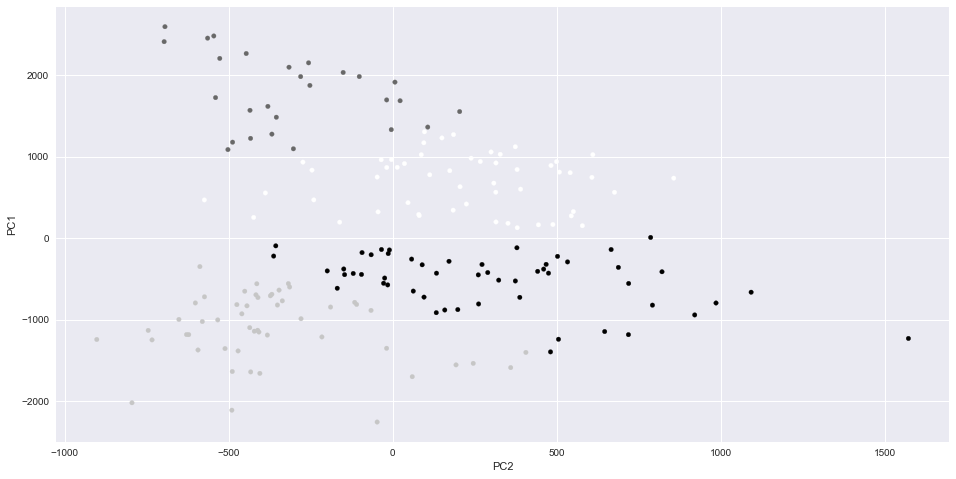

In [20]:
import numpy as np

child_mortality_PC_df.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=child_mortality_PC_df.cluster.astype(np.float), 
    figsize=(16,8))

In [51]:
child_mortality_PC_df_cluster0= child_mortality_clean[child_mortality_clean['cluster']==0]
child_mortality_PC_df_cluster1= child_mortality_clean[child_mortality_clean['cluster']==1]
child_mortality_PC_df_cluster2= child_mortality_clean[child_mortality_clean['cluster']==2]
child_mortality_PC_df_cluster3= child_mortality_clean[child_mortality_clean['cluster']==3]
child_mortality_PC_df_cluster4= child_mortality_clean[child_mortality_clean['cluster']==4]



In [22]:
def timeseries_for_countries(selected_countries):

    labels = []

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(selected_countries.shape[0]):
        
        selected_countries.iloc[i].plot(x=selected_countries.axes[1],figsize=(16,8), linewidth=3, fontsize=20)
        labels.append(selected_countries.index[i])
        plt.legend(labels);
    ax.legend(bbox_to_anchor=(1.1, 1.05))

In [23]:
def timeseries_for_countries_mean(cluster_df):
    cluster_df.loc['mean'] = cluster_df.mean()
    cluster_df.iloc[-1].plot(x=cluster_df.axes[1],figsize=(16,8), linewidth=5, fontsize=20)



/Users/camilarangelsmith/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


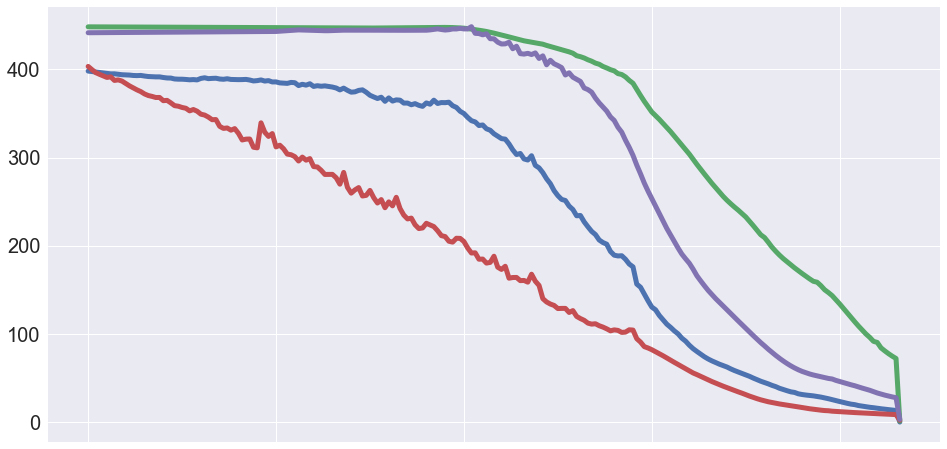

In [24]:
timeseries_for_countries_mean(child_mortality_PC_df_cluster0)
timeseries_for_countries_mean(child_mortality_PC_df_cluster1)
timeseries_for_countries_mean(child_mortality_PC_df_cluster2)
timeseries_for_countries_mean(child_mortality_PC_df_cluster3)
timeseries_for_countries_mean(child_mortality_PC_df_cluster4)

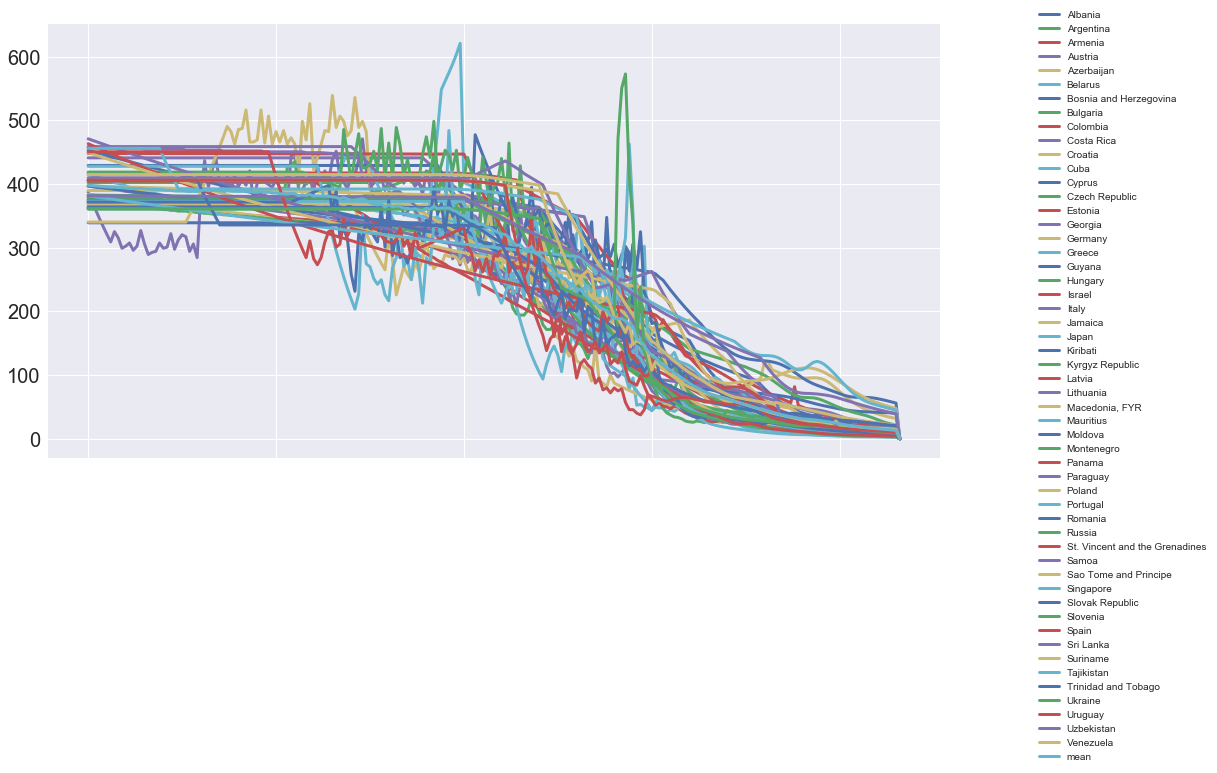

In [25]:
timeseries_for_countries(child_mortality_PC_df_cluster0)

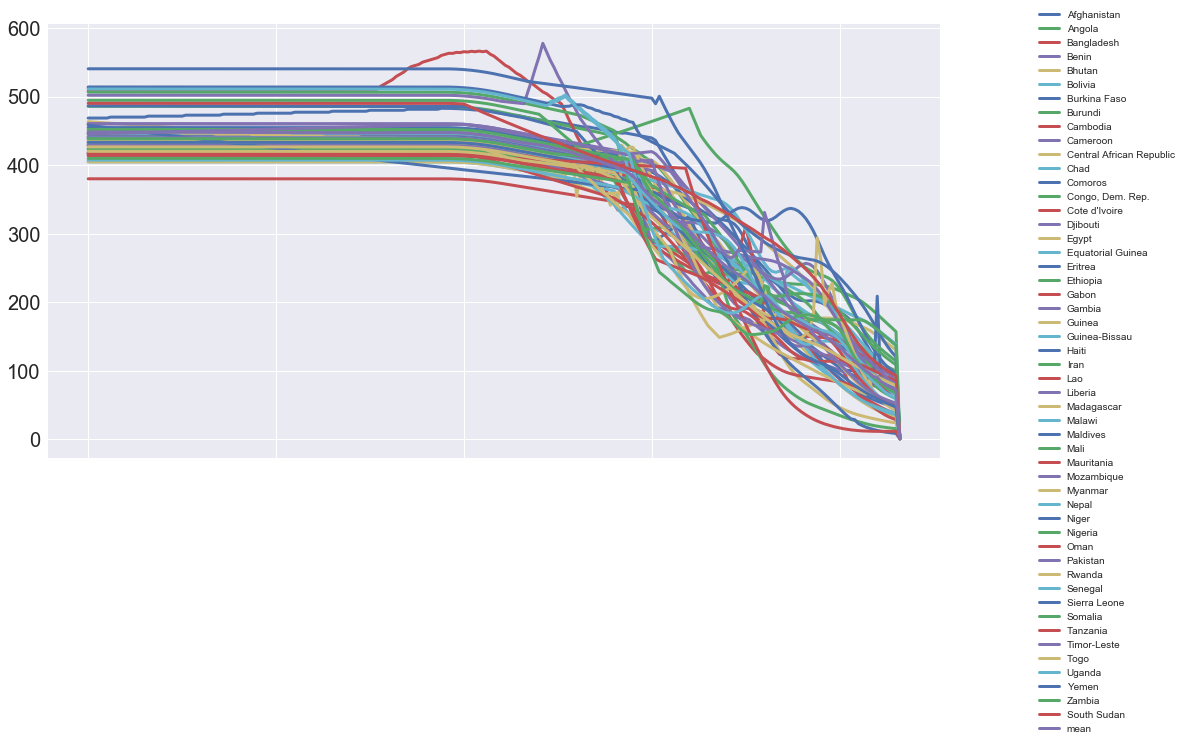

In [26]:
timeseries_for_countries(child_mortality_PC_df_cluster1)

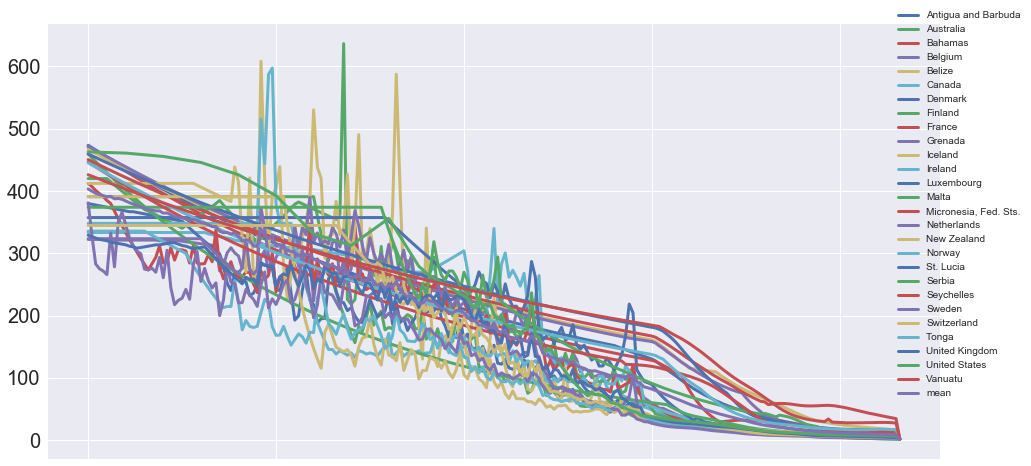

In [27]:
timeseries_for_countries(child_mortality_PC_df_cluster2)

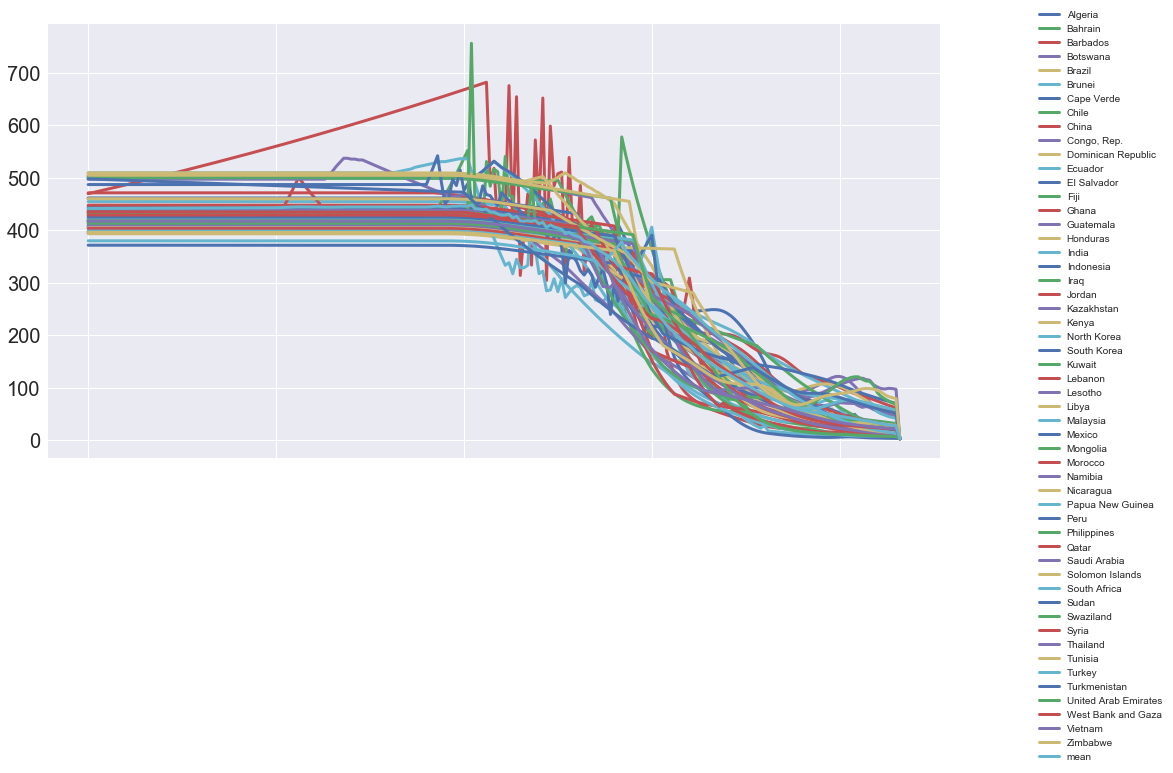

In [28]:
timeseries_for_countries(child_mortality_PC_df_cluster3)

Relate this to income:

In [38]:
file_path = 'data/gapminder_gdp_per_capita.csv'
gdp_per_capita_df = pd.read_csv(file_path, index_col = 0)

gdp_per_capita_df.shape
gdp_per_capita_df.reset_index(level=0, inplace=True)


In [39]:
gdp_per_capita_df_clean = gdp_per_capita_df.dropna()
gdp_per_capita_df_clean.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0
6,Andorra,1197.0,1199.0,1201.0,1204.0,1206.0,1208.0,1210.0,1212.0,1215.0,...,42738.0,43442.0,41426.0,41735.0,38982.0,41958.0,41926.0,43735.0,44929.0,46577.0
7,Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,...,5445.0,6453.0,7103.0,7039.0,7047.0,7094.0,7230.0,7488.0,7546.0,7615.0


In [40]:
gdp_list = []
for i in range(child_mortality_clean.shape[0]):
    
    name =  child_mortality_clean.index[i]
    try:    
        gdp = float(gdp_per_capita_df_clean[gdp_per_capita_df_clean['GDP per capita']==name]['2015'])
    except Exception:
        print name
        gdp = np.nan
    gdp_list.append(gdp)
    
child_mortality_clean['GDP']= gdp_list

In [41]:
child_mortality_clean = child_mortality_clean.dropna()

child_mortality_clean

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,cluster,GDP
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1,1,1925.0
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0,0,10620.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0,3,13434.0
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9,1,7615.0
Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,440.23,...,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1,2,21049.0
Argentina,402.19,402.19,402.19,402.19,402.19,402.19,402.19,402.19,402.19,402.19,...,15.4,15.0,14.6,14.2,13.8,13.3,12.9,12.5,0,17344.0
Armenia,371.20,370.71,370.23,369.75,369.26,368.78,368.30,367.82,367.34,366.86,...,20.0,19.0,18.0,17.2,16.3,15.5,14.9,14.2,0,7763.0
Australia,390.99,390.99,390.99,390.99,390.99,390.99,390.99,390.99,390.99,390.99,...,5.2,5.0,4.8,4.5,4.2,4.0,3.7,3.5,2,44056.0
Austria,387.32,373.01,359.22,345.95,333.16,320.85,308.99,325.26,315.50,299.15,...,4.6,4.5,4.4,4.2,4.0,3.9,3.7,3.5,0,44401.0


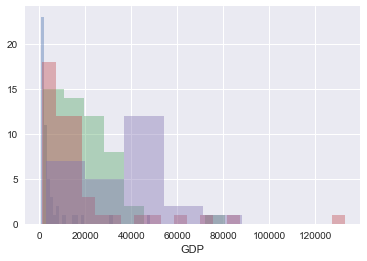

In [52]:
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==1]['GDP'],kde=False);
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==0]['GDP'],kde=False);
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==3]['GDP'],kde=False);
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==2]['GDP'],kde=False);



In [44]:
print child_mortality_clean[child_mortality_clean['cluster']==0]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==0].index

19607.8269231
Index([u'Albania', u'Argentina', u'Armenia', u'Austria', u'Azerbaijan',
       u'Belarus', u'Bosnia and Herzegovina', u'Bulgaria', u'Colombia',
       u'Costa Rica', u'Cuba', u'Cyprus', u'Czech Republic', u'Estonia',
       u'Georgia', u'Germany', u'Greece', u'Guyana', u'Hungary', u'Israel',
       u'Italy', u'Jamaica', u'Japan', u'Kiribati', u'Kyrgyz Republic',
       u'Latvia', u'Lithuania', u'Macedonia, FYR', u'Mauritius', u'Moldova',
       u'Montenegro', u'Panama', u'Paraguay', u'Poland', u'Portugal',
       u'Romania', u'Russia', u'St. Vincent and the Grenadines', u'Samoa',
       u'Sao Tome and Principe', u'Singapore', u'Slovak Republic', u'Slovenia',
       u'Spain', u'Sri Lanka', u'Suriname', u'Tajikistan',
       u'Trinidad and Tobago', u'Ukraine', u'Uruguay', u'Uzbekistan',
       u'Venezuela'],
      dtype='object', name=u'country')


In [45]:
print child_mortality_clean[child_mortality_clean['cluster']==1]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==1].index

4996.09803922
Index([u'Afghanistan', u'Angola', u'Bangladesh', u'Benin', u'Bhutan',
       u'Bolivia', u'Burkina Faso', u'Burundi', u'Cambodia', u'Cameroon',
       u'Central African Republic', u'Chad', u'Comoros', u'Congo, Dem. Rep.',
       u'Cote d'Ivoire', u'Djibouti', u'Egypt', u'Equatorial Guinea',
       u'Eritrea', u'Ethiopia', u'Gabon', u'Gambia', u'Guinea',
       u'Guinea-Bissau', u'Haiti', u'Iran', u'Lao', u'Liberia', u'Madagascar',
       u'Malawi', u'Maldives', u'Mali', u'Mauritania', u'Mozambique',
       u'Myanmar', u'Nepal', u'Niger', u'Nigeria', u'Oman', u'Pakistan',
       u'Rwanda', u'Senegal', u'Sierra Leone', u'Somalia', u'Tanzania',
       u'Timor-Leste', u'Togo', u'Uganda', u'Yemen', u'Zambia',
       u'South Sudan'],
      dtype='object', name=u'country')


In [47]:
print child_mortality_clean[child_mortality_clean['cluster']==2]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==2].index

34001.1111111
Index([u'Antigua and Barbuda', u'Australia', u'Bahamas', u'Belgium', u'Belize',
       u'Canada', u'Denmark', u'Finland', u'France', u'Grenada', u'Iceland',
       u'Ireland', u'Luxembourg', u'Malta', u'Micronesia, Fed. Sts.',
       u'Netherlands', u'New Zealand', u'Norway', u'St. Lucia', u'Serbia',
       u'Seychelles', u'Sweden', u'Switzerland', u'Tonga', u'United Kingdom',
       u'United States', u'Vanuatu'],
      dtype='object', name=u'country')


In [48]:
print child_mortality_clean[child_mortality_clean['cluster']==3]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==3].index

17905.4716981
Index([u'Algeria', u'Bahrain', u'Barbados', u'Botswana', u'Brazil', u'Brunei',
       u'Cape Verde', u'Chile', u'China', u'Congo, Rep.',
       u'Dominican Republic', u'Ecuador', u'El Salvador', u'Fiji', u'Ghana',
       u'Guatemala', u'Honduras', u'India', u'Indonesia', u'Iraq', u'Jordan',
       u'Kazakhstan', u'Kenya', u'North Korea', u'South Korea', u'Kuwait',
       u'Lebanon', u'Lesotho', u'Libya', u'Malaysia', u'Mexico', u'Mongolia',
       u'Morocco', u'Namibia', u'Nicaragua', u'Papua New Guinea', u'Peru',
       u'Philippines', u'Qatar', u'Saudi Arabia', u'Solomon Islands',
       u'South Africa', u'Sudan', u'Swaziland', u'Syria', u'Thailand',
       u'Tunisia', u'Turkey', u'Turkmenistan', u'United Arab Emirates',
       u'West Bank and Gaza', u'Vietnam', u'Zimbabwe'],
      dtype='object', name=u'country')


In [36]:
gdp_list = []
for i in range(child_mortality_PC_df.shape[0]):
    
    name =  child_mortality_PC_df.index[i]
    try:    
        gdp = float(gdp_per_capita_df_clean[gdp_per_capita_df_clean['GDP per capita']==name]['2015'])
    except Exception:
        print name
        gdp = np.nan
    gdp_list.append(gdp)
    print name, gdp

    
child_mortality_PC_df['GDP']= gdp_list
child_mortality_PC_df = child_mortality_PC_df.dropna()


Afghanistan 1925.0
Albania 10620.0
Algeria 13434.0
Angola 7615.0
Antigua and Barbuda 21049.0
Argentina 17344.0
Armenia 7763.0
Australia 44056.0
Austria 44401.0
Azerbaijan 16986.0
Bahamas 22818.0
Bahrain 44138.0
Bangladesh 3161.0
Barbados 12984.0
Belarus 17415.0
Belgium 41240.0
Belize 8501.0
Benin 1830.0
Bhutan 7983.0
Bolivia 6295.0
Bosnia and Herzegovina 9833.0
Botswana 17196.0
Brazil 15441.0
Brunei 73003.0
Bulgaria 16371.0
Burkina Faso 1654.0
Burundi 777.0
Cambodia 3267.0
Cameroon 2897.0
Canada 43294.0
Cape Verde 6514.0
Central African Republic 599.0
Chad 2191.0
Chile 22465.0
China 13334.0
Colombia 12761.0
Comoros 1472.0
Congo, Dem. Rep. 809.0
Congo, Rep. 6220.0
Costa Rica 14132.0
Cote d'Ivoire 3491.0
Croatia
Croatia nan
Cuba 21291.0
Cyprus 29797.0
Czech Republic 29437.0
Denmark 43495.0
Djibouti 3139.0
Dominican Republic 12837.0
Ecuador 10996.0
Egypt 11031.0
El Salvador 7776.0
Equatorial Guinea 31087.0
Eritrea 1129.0
Estonia 26812.0
Ethiopia 1520.0
Fiji 7925.0
Finland 38923.0
France 3

(0.48694010016653255, 2.7571845645855537e-12)


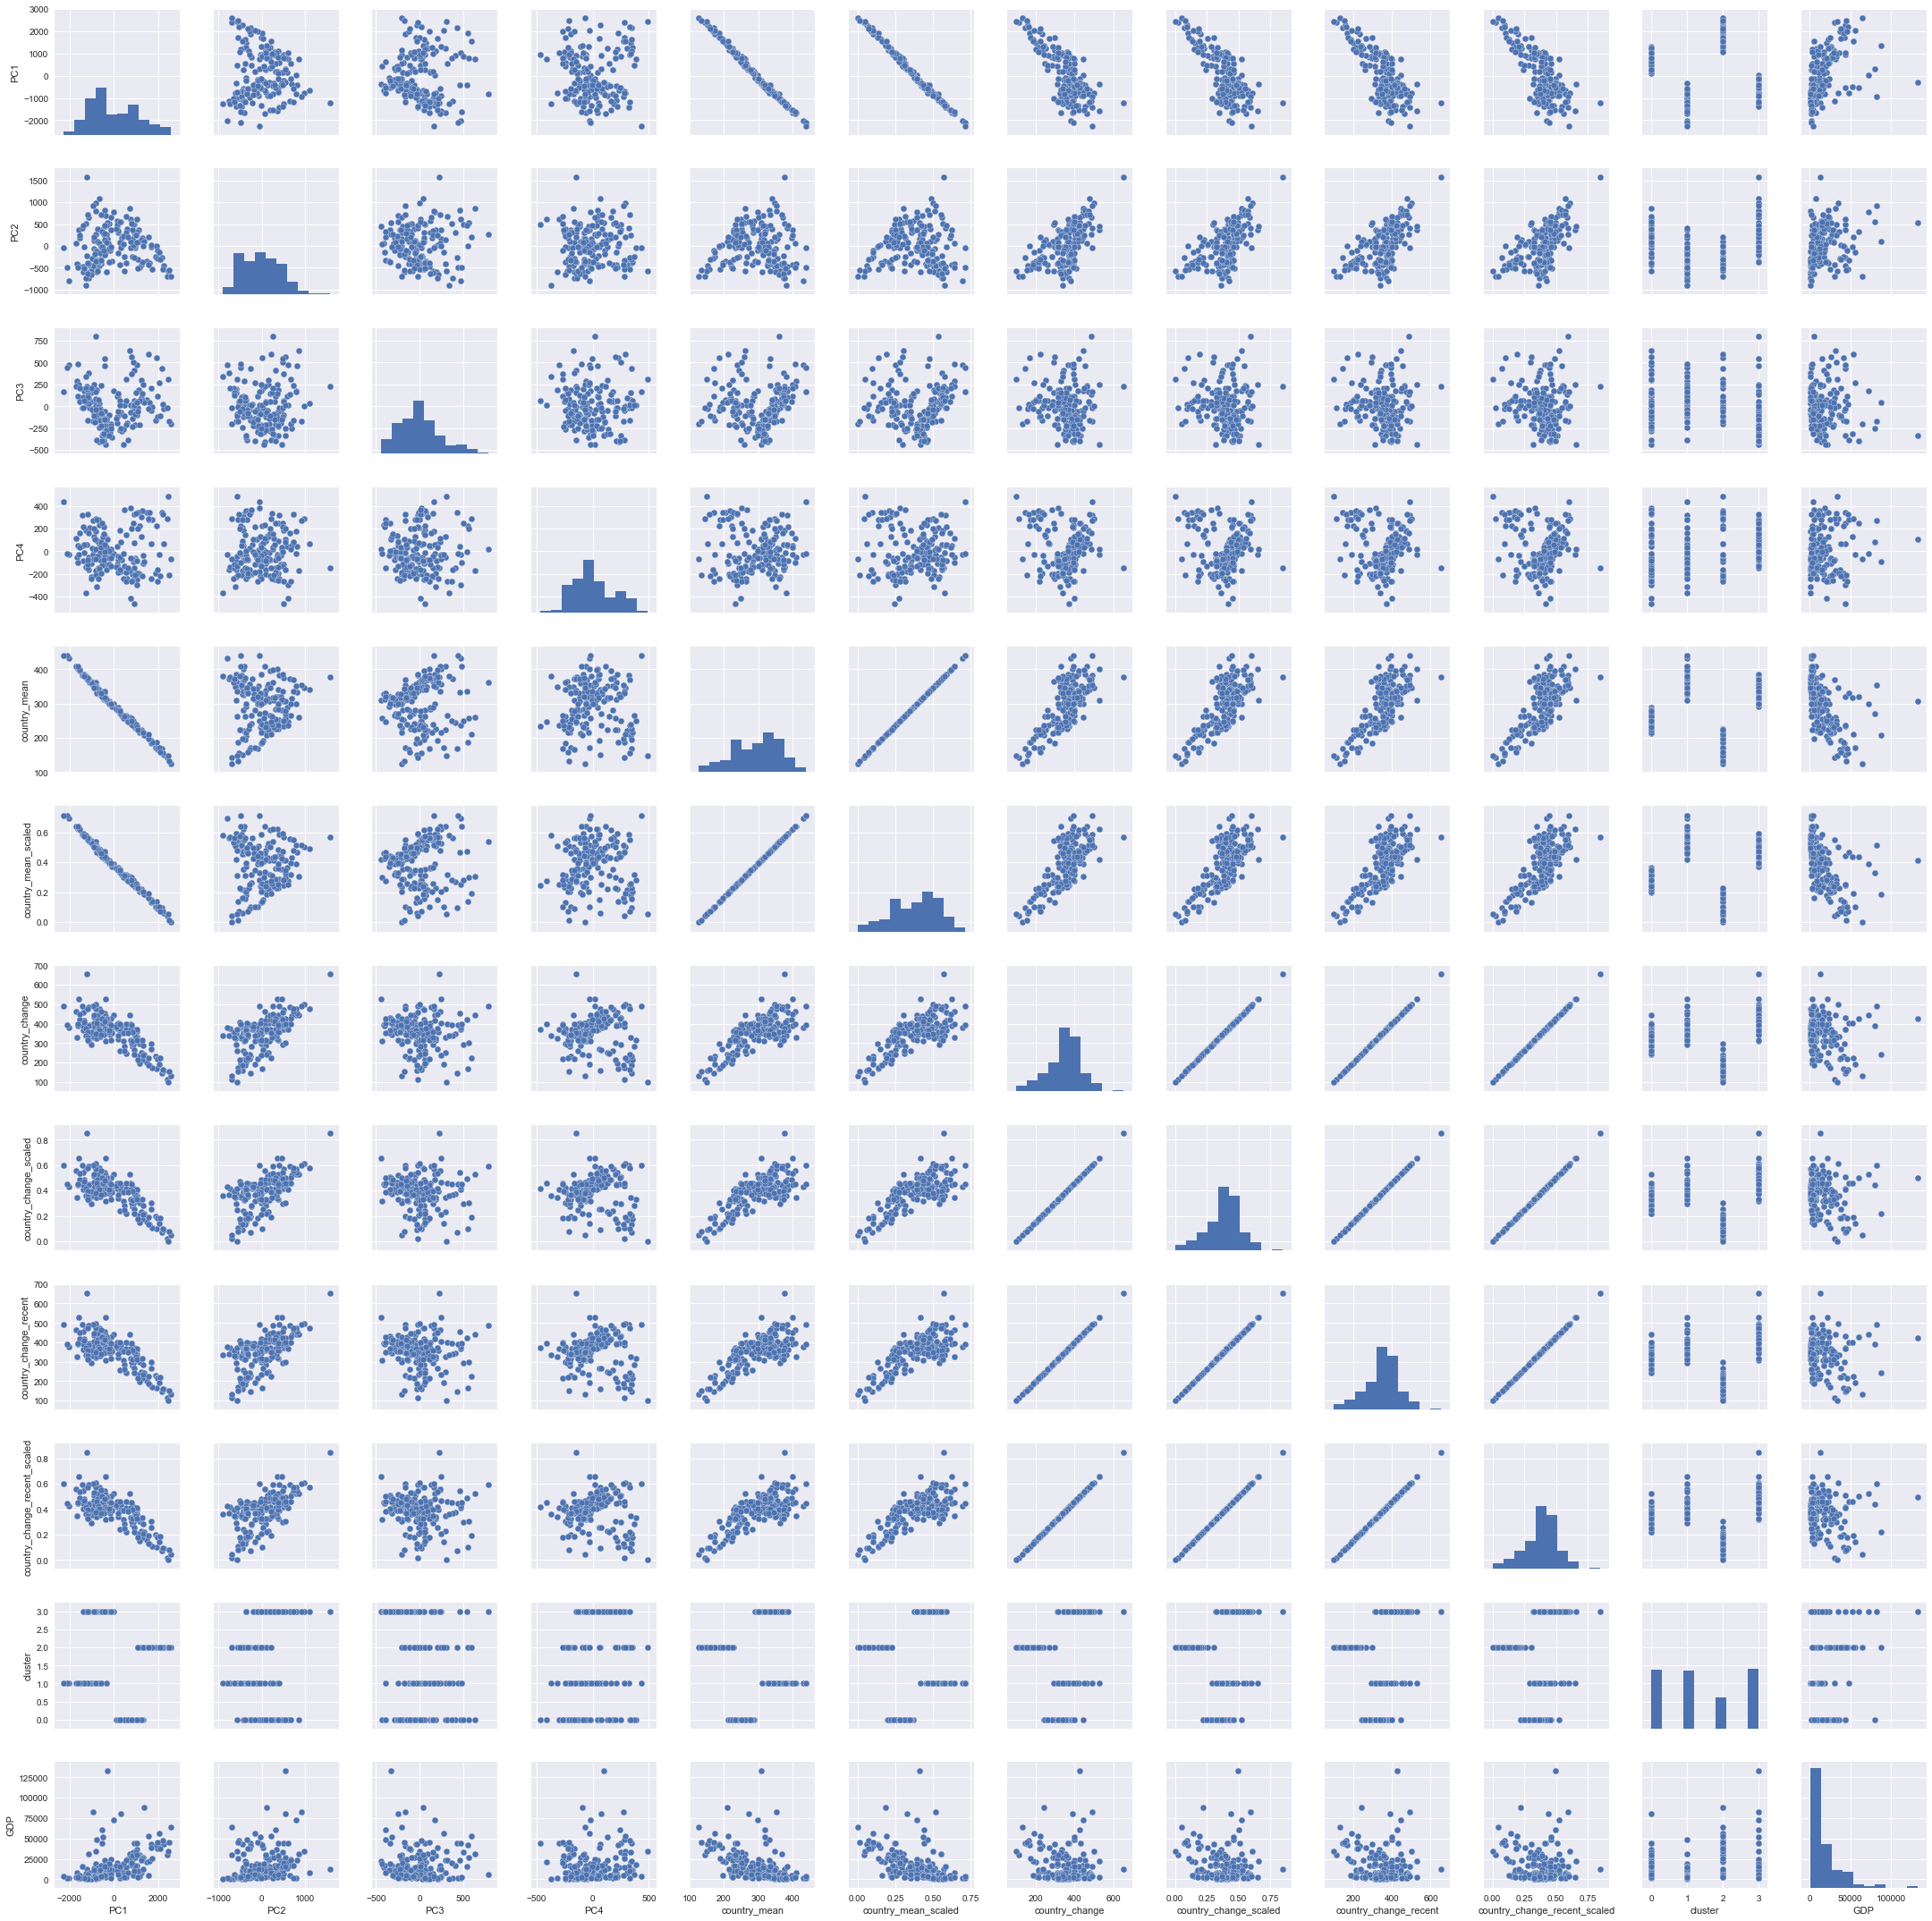

In [37]:
seaborn.pairplot(child_mortality_PC_df)
from scipy.stats.stats import pearsonr   

print pearsonr(child_mortality_PC_df['PC1'], child_mortality_PC_df['GDP'])